In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv(r"E:/Class Notes/jillu mam/ML/Exam/6 KNN + SVM + Naive Bayes + PCA/Wine.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.shape

(178, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<AxesSubplot: >

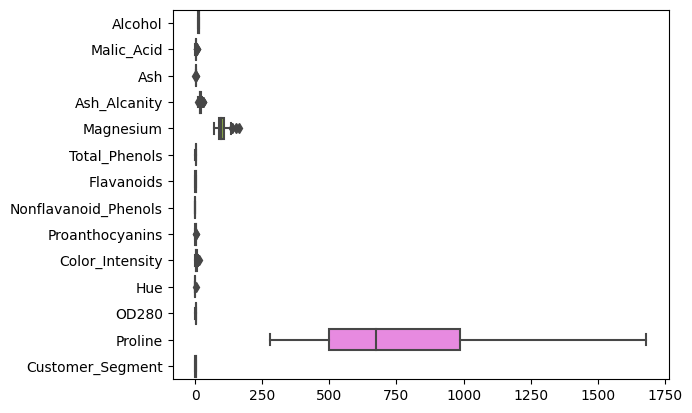

In [18]:
sns.boxplot(df,orient='h')

In [23]:
df_iqr=df
Q1= df_iqr.quantile(0.25)
Q3=df_iqr.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Alcohol                   1.3150
Malic_Acid                1.4800
Ash                       0.3475
Ash_Alcanity              4.3000
Magnesium                19.0000
Total_Phenols             1.0575
Flavanoids                1.6700
Nonflavanoid_Phenols      0.1675
Proanthocyanins           0.7000
Color_Intensity           2.9800
Hue                       0.3375
OD280                     1.2325
Proline                 484.5000
Customer_Segment          2.0000
dtype: float64


In [24]:
df_out= df_iqr[~((df_iqr < (Q1-1.5*IQR)) | (df_iqr > (Q3+1.5*IQR))).any(axis=1)]

print('before filtering: ',df_iqr.shape)
print('after filtering:',df_out.shape)

before filtering:  (178, 14)
after filtering: (161, 14)


In [25]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [26]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


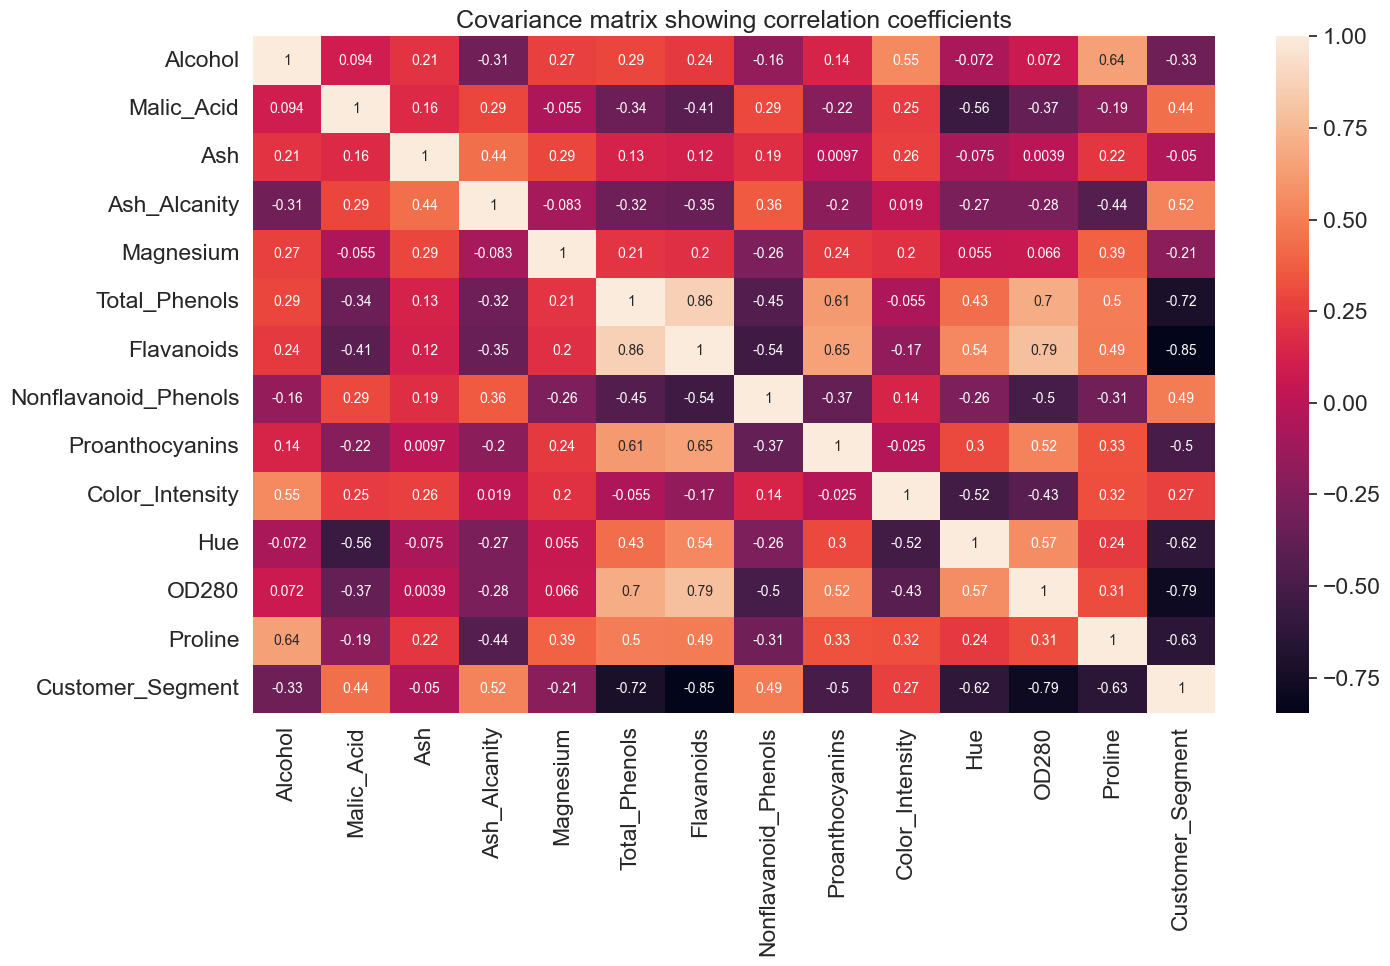

In [19]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
map = sns.heatmap(pd.DataFrame(df).corr(),annot=True,annot_kws={"size":10})
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show() 

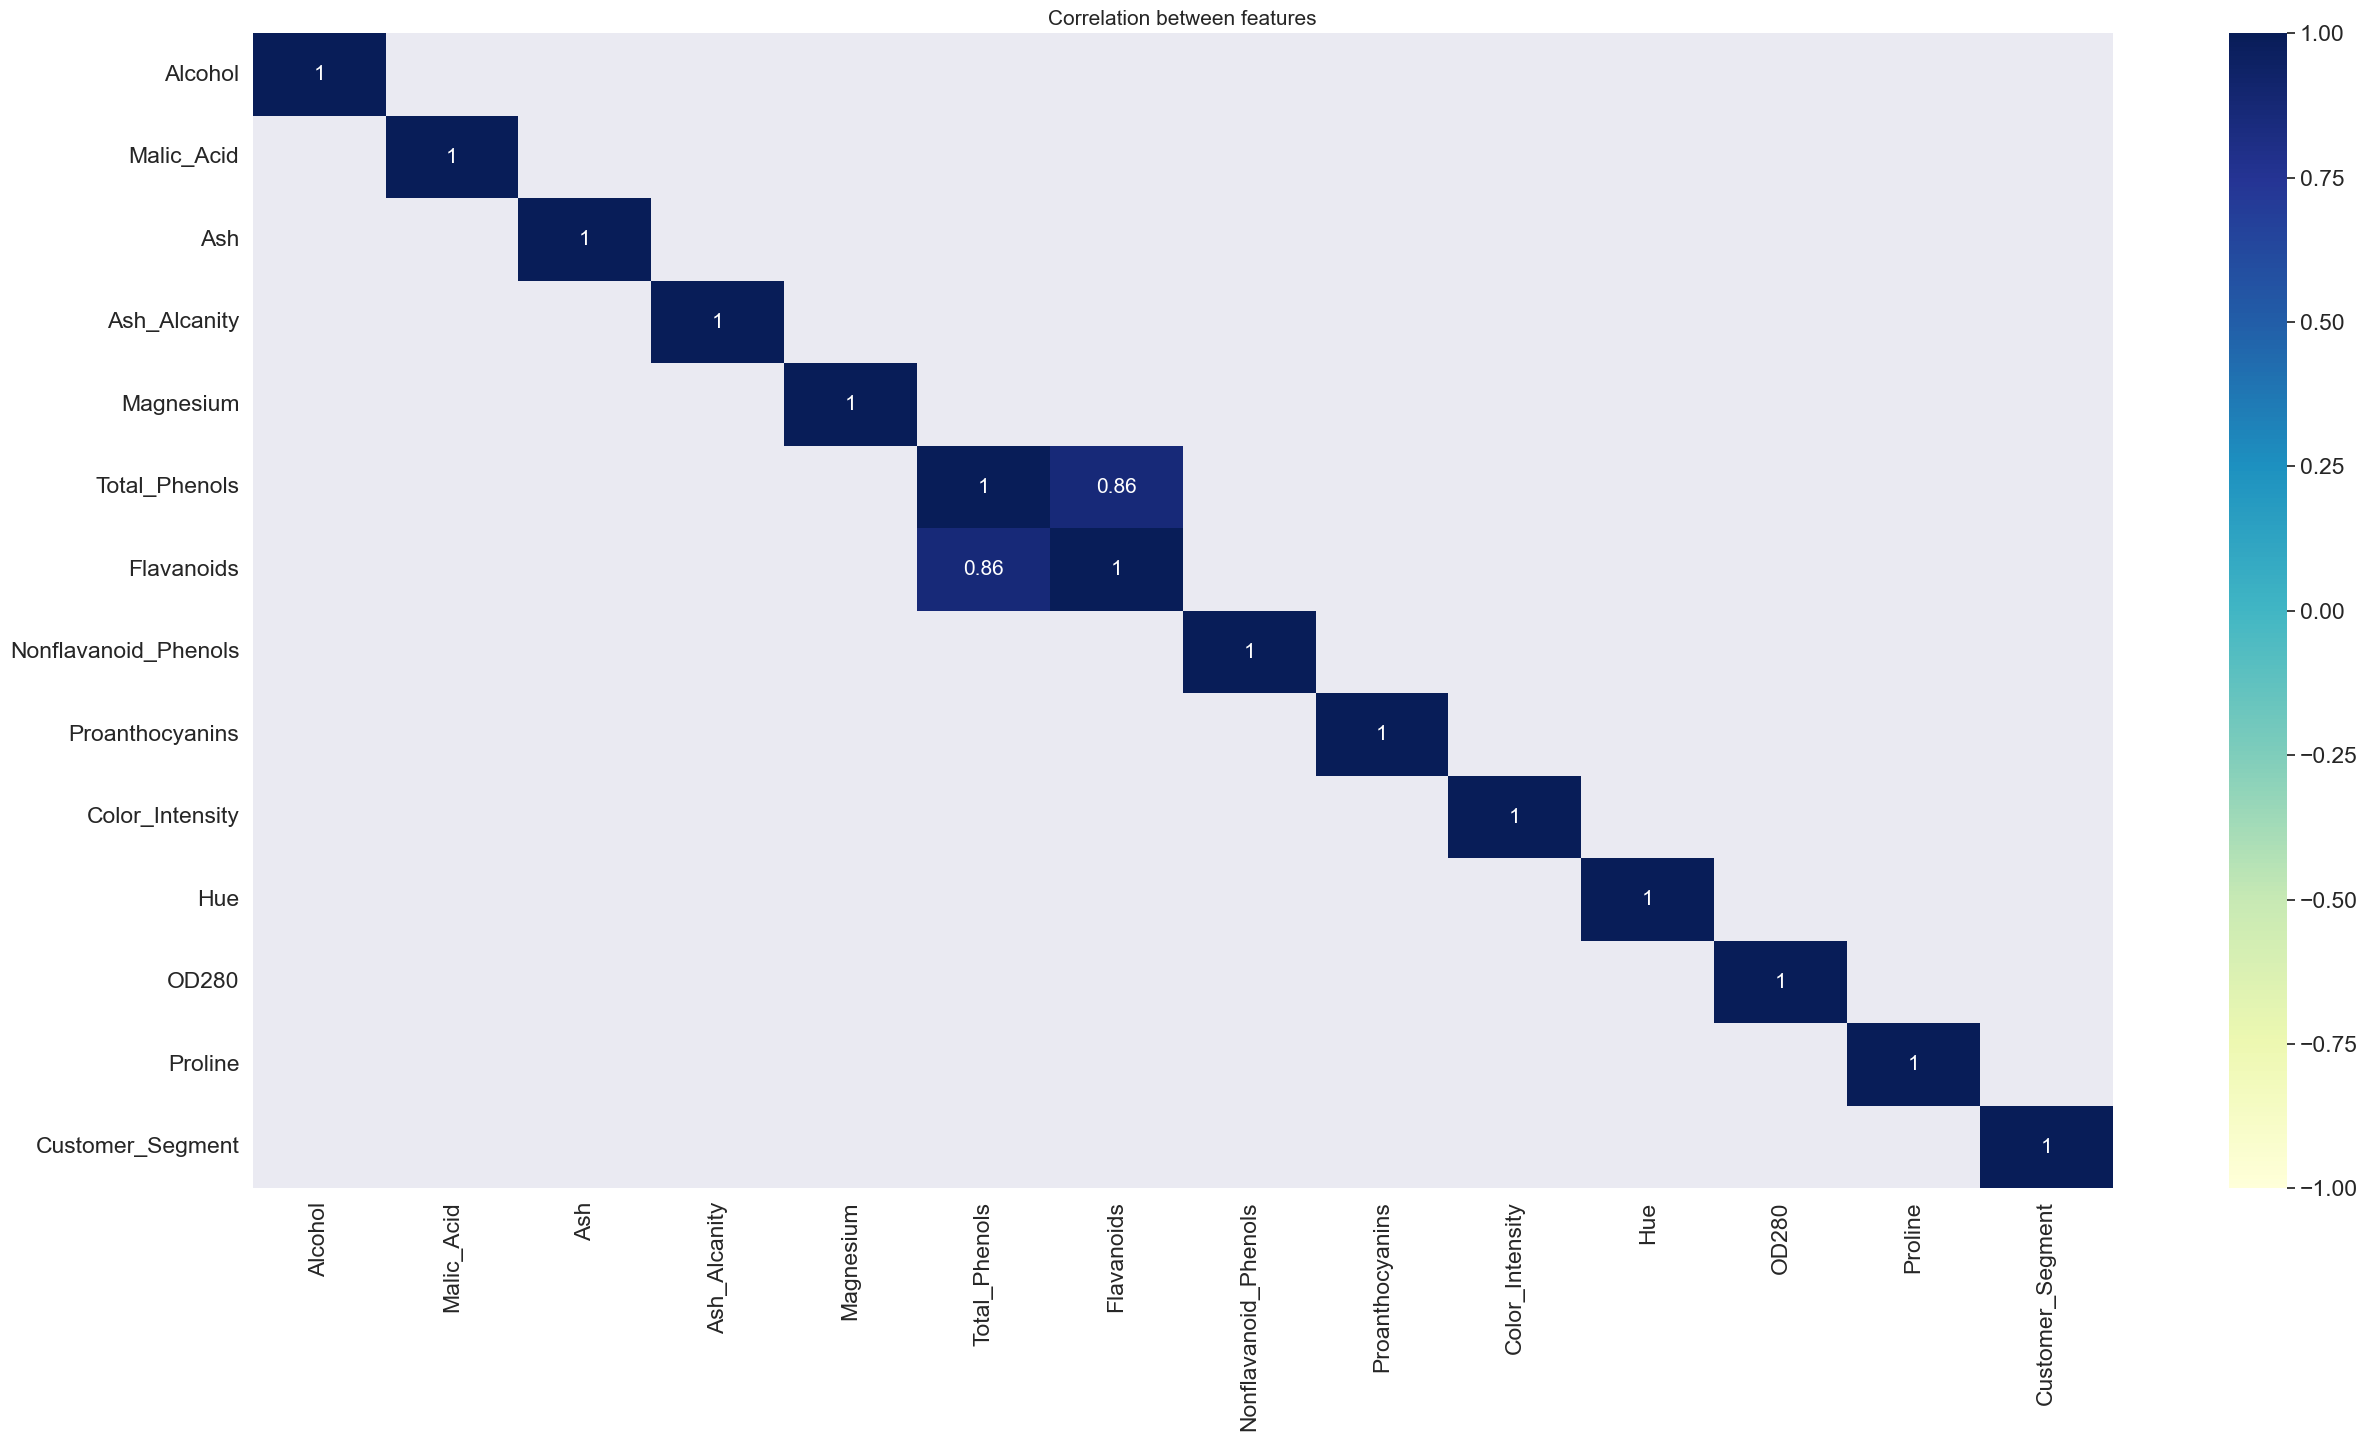

In [28]:
corr = df.corr()                                                     
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})
plt.title('Correlation between features', fontsize=15)
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df_out.drop(['Customer_Segment'],axis=1)
y= df_out['Customer_Segment']
x =scaler.fit_transform(x)

In [74]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2,random_state=100)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,20)}

knn_gscv = GridSearchCV(knn,param_grid,cv=5)

knn_gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [62]:
knn_gscv.best_params_

{'n_neighbors': 5}

In [63]:
knn_gscv.best_score_

0.968923076923077

SVM Technique

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [75]:
from sklearn import preprocessing

x_train_scaled = preprocessing.scale(x_train)
x_test_scaled  = preprocessing.scale(x_test)

x_train = x_train_scaled
x_test = x_test_scaled

In [76]:
from sklearn.svm import SVC

In [83]:
svm = SVC(random_state=0,kernel='linear',probability=True)
svm.fit(x_train,y_train)
svm_y_pred = svm.predict(x_test)
svm_score = svm.score(x_test,y_test)


In [84]:
svm_score_accurarcy = accuracy_score(y_test,svm_y_pred)


In [87]:
svm_score_accurarcy

0.9393939393939394

NAIVE BAYES THEOREM


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [107]:
from sklearn.model_selection import train_test_split as tts
x1 =df.drop('Customer_Segment', axis=1)
y1=df['Customer_Segment']
x_train,x_test,y_train,y_test = tts(x1,y1,test_size = 0.3)

In [108]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [109]:

sel.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True, False,  True,  True])

In [110]:
sel.get_support().sum()

5

In [111]:
selected_feat = x_train.columns[(sel.get_support())]
len(selected_feat)

5

In [112]:
selected_feat

Index(['Alcohol', 'Flavanoids', 'Color_Intensity', 'OD280', 'Proline'], dtype='object')

In [114]:
x =df[selected_feat]
x

,Alcohol,Flavanoids,Color_Intensity,OD280,Proline
0,14.23,3.06,5.64,3.92,1065
1,13.20,2.76,4.38,3.40,1050
2,13.16,3.24,5.68,3.17,1185
3,14.37,3.49,7.80,3.45,1480
4,13.24,2.69,4.32,2.93,735
...,...,...,...,...,...
173,13.71,0.61,7.70,1.74,740
174,13.40,0.75,7.30,1.56,750
175,13.27,0.69,10.20,1.56,835
176,13.17,0.68,9.30,1.62,840


In [116]:
x_train,x_test,y_train,y_test = tts(x,y1,test_size=0.3)

In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:
model =GaussianNB()

In [120]:
model.fit(x_train,y_train)


GaussianNB()

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
target_pred = model.predict(x_test)

In [123]:
accuracy_score(y_test,target_pred)

0.9629629629629629

In [124]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
estimators = []
result =0
from sklearn.model_selection import StratifiedKFold
estimators.append(('standardize',StandardScaler()))
estimators.append(('naive_bayes',BernoulliNB()))
model = Pipeline(estimators)
seed = 1
param_grid = [{'naive_bayes__alpha':[0.0001,0.00001,0.001,0.003,0.01,0.03,0.1,0.3,1]}]
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
grid = GridSearchCV(model,param_grid,cv=kfold,scoring = 'accuracy')
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print(accuracy_score(y_test,grid.predict(x_test)))

0.9186666666666665
{'naive_bayes__alpha': 0.0001}
Pipeline(steps=[('standardize', StandardScaler()),
                ('naive_bayes', BernoulliNB(alpha=0.0001))])
0.8888888888888888


In [125]:
model = BernoulliNB(alpha=0.0001)
model.fit(x_train,y_train)
y_pred =model.predict(x_test)
accuracy_score(y_test,y_pred)

0.3333333333333333

In [126]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [128]:
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8148148148148148

PCA Technique

In [139]:
x2 = df_out.drop(['Customer_Segment'],axis=1)
y2= df_out['Customer_Segment']

In [140]:
from sklearn.decomposition import PCA
pca=PCA().fit(x2)

In [141]:
principalComponents= pca.fit_transform(x2)
pdf=pd.DataFrame(data=principalComponents,columns=['Component_'+str(i) for i in range(1,14)])

In [142]:
pdf

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13
0,306.349435,23.161743,-2.954999,-0.486525,-0.557004,0.379088,0.456247,-0.393013,-0.730730,0.098449,-0.000609,-0.005019,0.079342
1,290.903293,-3.650510,-6.644760,0.986146,1.052591,-0.239904,-0.146386,-0.522616,0.172091,-0.134302,0.034452,-0.077739,-0.010059
2,425.869020,-4.828941,1.131349,-0.832375,-0.443343,0.697864,-0.731313,0.400632,-0.493047,0.021728,0.198335,-0.042142,-0.004188
3,721.043044,2.166673,0.893167,0.350185,-0.972542,0.532079,-0.098672,-0.238993,0.255906,0.423612,-0.150311,-0.136210,0.009814
4,-23.782220,19.854712,0.757631,-1.965808,-0.438842,0.761034,0.074917,0.134791,0.120527,0.065406,0.267749,-0.003091,0.052378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,-99.218353,-5.614389,2.113056,4.996434,-0.864287,-0.541341,0.772220,-0.126477,-0.203189,0.182374,0.195719,-0.081608,-0.051896
157,-9.066398,3.783569,4.584980,1.443507,0.661416,0.332321,0.021652,0.283426,-0.059197,0.232709,-0.087003,0.046810,-0.044054
158,76.247942,20.383131,2.594822,4.224439,0.593907,0.185907,-0.709376,-0.141384,-0.308710,-0.006119,-0.244904,0.141579,0.027520
159,81.245892,20.243173,2.124819,3.069452,-0.066781,-1.048228,-0.437616,-0.041885,-0.449719,0.221495,-0.103303,0.003658,0.125451


In [143]:
features=x2.T
cov_matrix=np.cov(features)
cov_matrix[:5]

array([[ 6.36549860e-01,  7.32868129e-02,  4.26706405e-02,
        -8.67205862e-01,  4.13104969e+00,  1.72097985e-01,
         2.51341079e-01, -1.76580512e-02,  9.97219720e-02,
         9.28717816e-01,  5.05960404e-04,  6.71629425e-02,
         1.70893958e+02],
       [ 7.32868129e-02,  1.09885553e+00,  4.47273680e-02,
         9.62152950e-01,  2.76452640e-01, -2.42513812e-01,
        -4.70601048e-01,  3.80221856e-02, -1.34180512e-01,
         6.34713264e-01, -1.33105976e-01, -2.92055637e-01,
        -6.26150811e+01],
       [ 4.26706405e-02,  4.47273680e-02,  5.81797205e-02,
         2.24505512e-01,  1.24541809e+00,  1.71006405e-02,
         1.22230745e-02,  2.55742236e-03,  4.12387811e-03,
         1.01844966e-01, -2.08641227e-03, -4.06984084e-03,
         2.10711922e+01],
       [-8.67205862e-01,  9.62152950e-01,  2.24505512e-01,
         9.08845031e+00, -6.97111025e+00, -8.79918362e-01,
        -1.52799189e+00,  1.24779309e-01, -5.33187422e-01,
        -4.47735250e-01, -2.14344682e

In [144]:
values,vectors = np.linalg.eig(cov_matrix)
values[:5]

array([1.04923867e+05, 1.22413652e+02, 7.40641499e+00, 3.98678593e+00,
       9.69590408e-01])

In [145]:
vectors[:5]

array([[ 1.62922553e-03, -1.00305315e-02,  9.06924693e-03,
         1.30316294e-01,  6.58417446e-02, -2.32569102e-01,
         9.49501073e-01,  1.29090477e-01, -4.88012494e-02,
         5.52243223e-02,  1.34569934e-02, -2.40054551e-02,
        -1.82877001e-03],
       [-5.96668515e-04, -1.14575498e-02,  1.43991536e-01,
         1.93929605e-01, -5.69846651e-01, -7.59580715e-01,
        -1.66972480e-01,  1.91130921e-03,  6.35800042e-02,
        -5.74794011e-02,  1.98804114e-02,  6.42095252e-02,
        -9.49687817e-03],
       [ 2.00987371e-04, -7.27496621e-03,  4.14448823e-02,
        -1.94303235e-02,  5.63806518e-03, -3.90191942e-02,
         9.51570418e-04,  8.10180982e-03,  8.17428709e-02,
         4.30138789e-02, -9.62595525e-01, -2.08832901e-01,
        -1.32278394e-01],
       [-4.58535471e-03, -1.13232198e-02,  9.28564774e-01,
        -3.40530184e-01,  1.35931323e-01, -1.50040835e-02,
         2.49715455e-02,  1.25158455e-03,  4.27044755e-03,
        -1.11004116e-02,  4.54682851e

In [147]:
P1= x2.dot(vectors.T[0])

In [148]:
out=pd.DataFrame(P1,columns=['PC1'])

out.head()

,PC1
0,1066.976816
1,1051.530674
2,1186.496401
3,1481.670425
4,736.845161


Conclusion

In [150]:
print('KNN_Best Score:',knn_gscv.best_score_)
print('SVM_Best Score:',svm_score_accurarcy)
print('Naive Bayes Best Score:',accuracy_score(y_test,y_pred))

KNN_Best Score: 0.968923076923077
SVM_Best Score: 0.9393939393939394
Naive Bayes Best Score: 0.8148148148148148


IT IS VISIBLE THAT KNN IS GIVING THE HIGHEST ACCURACY SCORE AND CONCLUDING THAT IT THE BEST METHOD TO FIND WHETHER THE CUSTOMER WILL PURCHASE THE ITEM OR NOT.
